## Introduction ##

I am researching whether national suicide rates are correlated with economic opportunity, political freedom, and military presence, using the Gapminder dataset.  The variables I am using to measure these attributes are: Suicide Rate (per 100,000 population), Employment Rate, Armed Forces Rate (size of active military in proportion to population), and Polity Score.

### Pearson Correlations ###

Please see the highlighted sections under the discussion of each variable.


In [1]:
# Import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# Enable command results to be displayed in Jupyter notebook

%matplotlib inline

# Read in data

df = pd.read_csv('gapminder.csv',low_memory=False)

C:\Users\garymiller01\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Organizing Data ##

In [2]:
# View the first few rows of the dataframe

df.head(4)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92


In [3]:
# Get Dimensions of DataFrame

# There are 213 Rows, 16 columns

print(len(df))
print(len(df.columns))

213
16


In [4]:
# Confirm current data type of column 

df['armedforcesrate'].dtype

dtype('O')

In [5]:
# Convert the variables I want to keep to numeric

numCols = ['suicideper100th','employrate','armedforcesrate','polityscore']

for i in numCols:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [6]:
# Confirm data type conversion - now Float

df['armedforcesrate'].dtype

dtype('float64')

In [7]:
# Subset columns

keepCols = ['country','suicideper100th','employrate','armedforcesrate','polityscore']

df2 = df[keepCols]

df2.head()

,country,suicideper100th,employrate,armedforcesrate,polityscore
0,Afghanistan,6.684385,55.700001,0.569653,0
1,Albania,7.699330,51.400002,1.024736,9
2,Algeria,4.848770,50.500000,2.306817,2
3,Andorra,5.362179,NaN,NaN,NaN
4,Angola,14.554677,75.699997,1.461329,-2


##### Handling Missing Data #####

I dropped any countries that were missing a value for any of my variables. 

This left 152 countries to analyze.

In [8]:
# Drop countries with no values for any explanatory variables

df2 = df2.dropna(subset=['suicideper100th','employrate','armedforcesrate','polityscore'],how='any')

print(len(df2))

152


## Variable Analysis ##

### Suicide Rate - Response Variable ###

Most countries fall between 5 and 12 suicides per 100,000 population. I considered as outliers any country above 25 or below 1.5 per 100,000.  This distribution is unimodal and moderately right-skewed.

Four of the five countries with the lowest reported rates are in the Middle East.

Four of the seven countries with the highest rates are former Soviet republics (or in the case of Belarus, in the same region).

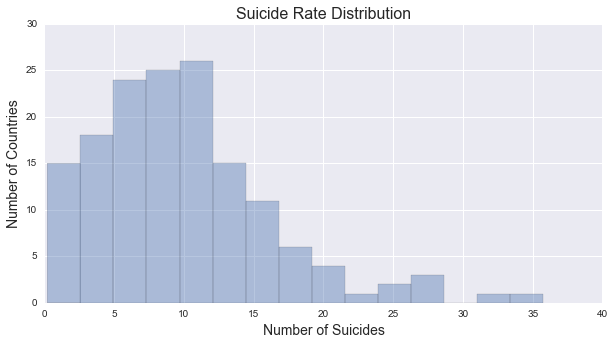

In [9]:
# Plot histogram to visualize distribution

plt.figure(figsize=(10,5))
g1 = sns.distplot(df2['suicideper100th'],kde=False)
g1.axes.set_title('Suicide Rate Distribution',fontsize=16)
g1.set_xlabel('Number of Suicides',fontsize=14)
g1.set_ylabel('Number of Countries',fontsize=14)

In [10]:
# Identify Upper Extremes

df2.loc[(df2['suicideper100th']>=25),('country','suicideper100th')].sort_values(by='suicideper100th',ascending=False)

,country,suicideper100th
80,Guyana,35.752872
110,Lithuania,33.341860
180,Sri Lanka,28.104046
159,Russia,27.874160
16,Belarus,26.874690
103,Laos,26.219198
96,Kazakhstan,25.404600


In [11]:
# Identify Lower Extremes

df2.loc[(df2['suicideper100th']<=1.5),('country','suicideper100th')].sort_values(by='suicideper100th')

,country,suicideper100th
95,Jordan,0.201449
186,Syria,0.523528
11,Azerbaijan,1.380965
201,United Arab Emirates,1.392951
101,Kuwait,1.498057


### Employment Rate  ###

The distribution of employment rates centers around 60%, with a high in the 80s and a low in the 30s.  It's important to note that the age cutoff is 15, which means that full-time high school and university-level students count as a negative in this metric.  So many high-performing economies are actually in the middle.

African countries are found at the high end of the range, while Middle Eastern countries are at the low end.

Two countries remaining in the dataset did not have employment rates reported.


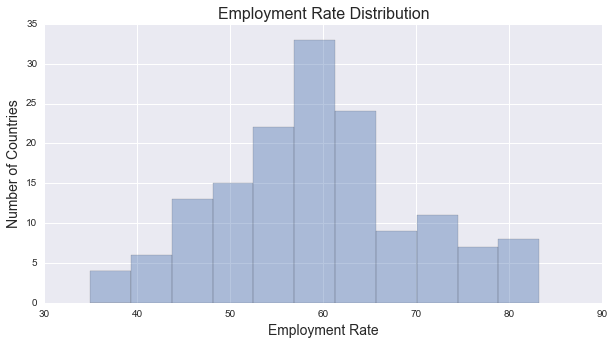

In [12]:
# Employment Rate Distribution

plt.figure(figsize=(10,5))
g2 = sns.distplot(df2['employrate'],kde=False)
g2.axes.set_title('Employment Rate Distribution',fontsize=16)
g2.set_xlabel('Employment Rate', fontsize=14)
g2.set_ylabel('Number of Countries', fontsize=14)

In [13]:
# Identify Upper Extremes

df2.loc[(df2['employrate']>=80),('country','employrate')].sort_values(by='employrate',ascending=False)


,country,employrate
29,Burundi,83.199997
199,Uganda,83.199997
114,Madagascar,83.000000
78,Guinea,81.500000
28,Burkina Faso,81.300003
60,Ethiopia,80.699997


In [14]:
# Identify lower Extremes

df2.loc[(df2['employrate']<=40),('country','employrate')].sort_values(by='employrate')


,country,employrate
113,"Macedonia, FYR",34.900002
89,Iraq,37.400002
95,Jordan,38.900002
210,"Yemen, Rep.",39.000000


#### Suicide Rate vs. Employment Rate ####

Suicide rate and employment rate are both reported as continuous quantitative variables.

The Pearson correlation coefficient (r value) of approximately 0.049 has an associated p-value of about 0.546.  A scatterplot shows a nearly horizontal regression line, points that do not follow the regression line very closely, and no evidence of a non-linear relationship in the data.  According to this data, there is no statistically significant linear relationship between employment rate and suicide rate.    

In [15]:
# Calculate statistics

stats.pearsonr(df2['employrate'],df2['suicideper100th'])

(0.049336439698108213, 0.54610491863906219)

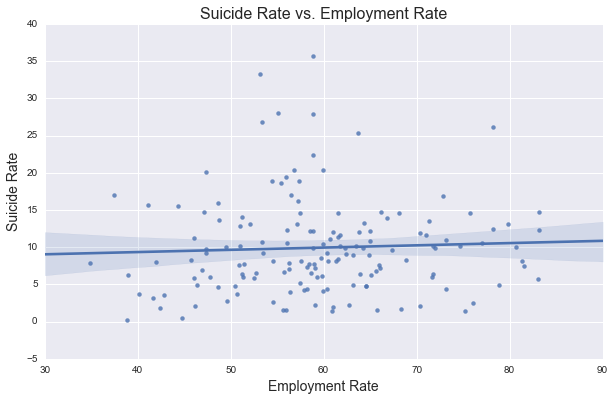

In [16]:
# Create scatterplot

plt.figure(figsize=(10,6))
g3 = sns.regplot(x='employrate',y='suicideper100th',data=df2)
g3.axes.set_title('Suicide Rate vs. Employment Rate',fontsize=16)
g3.set_xlabel('Employment Rate',fontsize=14)
g3.set_ylabel('Suicide Rate',fontsize=14)

### Armed Forces Rate ###

The vast majority of countries had armed forces rates of less than 1% of population.  This distribution is heavily right-skewed.

Outliers on the high side (above 6%) are North Korea, Eritrea, Iraq, and Singapore. 

On the low end are Haiti (which disbanded its military in 1995) and a number of African countries..

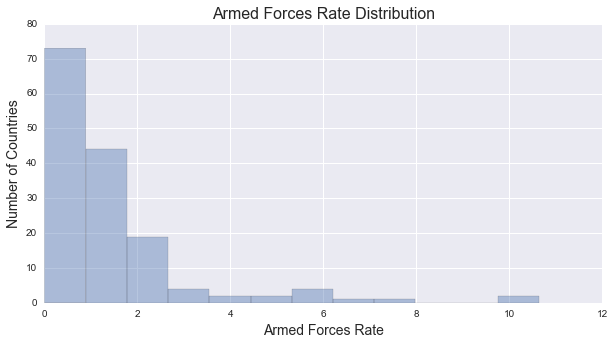

In [17]:
# Visualize distribution with histogram

plt.figure(figsize=(10,5))
g4 = sns.distplot(df2['armedforcesrate'],kde=False,bins=12)
g4.set_title('Armed Forces Rate Distribution',fontsize=16)
g4.set_xlabel('Armed Forces Rate', fontsize=14)
g4.set_ylabel('Number of Countries', fontsize=14)

In [18]:
# Identify higher outliers

df2.loc[(df2['armedforcesrate']>=6.0),('country','armedforcesrate')].sort_values(by='armedforcesrate',ascending=False)

,country,armedforcesrate
99,"Korea, Dem. Rep.",10.638521
58,Eritrea,9.820127
89,Iraq,7.737913
173,Singapore,6.394936


In [19]:
# Identify lower outliers

df2.loc[(df2['armedforcesrate']<=0.15),('country','armedforcesrate')].sort_values(by='armedforcesrate')

,country,armedforcesrate
81,Haiti,0.000000
131,Mozambique,0.102269
149,Papua New Guinea,0.105115
115,Malawi,0.114592
107,Liberia,0.129953
70,Ghana,0.131487
67,Gambia,0.134591
189,Tanzania,0.134730
35,Central African Rep.,0.148659


#### Suicide Rate vs. Armed Forces Rate ####

Suicide rate and armed forces rate are both reported as continuous quantitative variables.

The Pearson correlation coefficient of approximately -0.101, which indicates a slightly negative correlation, has an associated p-value of about 0.216.  The scatterplot shows a regression line with a very slight downward slope and points that do not follow the line very closely.  No non-linear relationship is apparant, and the linear relationship is very weak and not statistically significant.  In this case, the null hyopthesis, which states suicide rate and armed forces rate are nor associated, cannot be rejected.

In [20]:
# Calculate statistics

stats.pearsonr(df2['armedforcesrate'],df2['suicideper100th'])

(-0.10092492866358967, 0.21602171662330533)

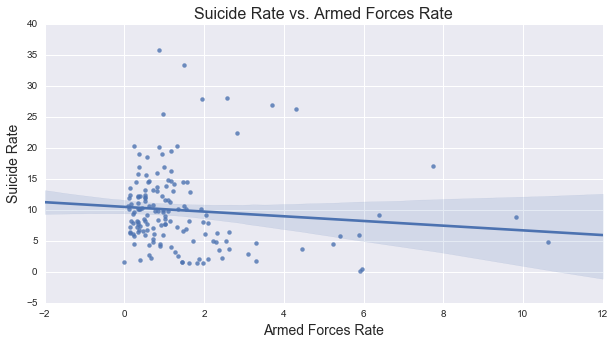

In [21]:
# Create scatterplot

plt.figure(figsize=(10,5))
g5 = sns.regplot(x='armedforcesrate',y='suicideper100th',data=df2)
g5.set_title('Suicide Rate vs. Armed Forces Rate',fontsize=16)
g5.set_xlabel('Armed Forces Rate', fontsize=14)
g5.set_ylabel('Suicide Rate', fontsize=14)

### Polity Scores ###

GapMinder classified each country's political freedom on a scale of -10 (autocracy) to +10 (democracy).  For more details, see the <a href="http://www.systemicpeace.org/polityproject.html" target="_blank">Polity IV Project</a> website.

Thirty-two countries were given the highest possible score, including much of Europe and North America, while 46 countries received negative scores.  This distribution is heavily left-skewed.

Countries with low scores are not limited to a particular geographic region. 

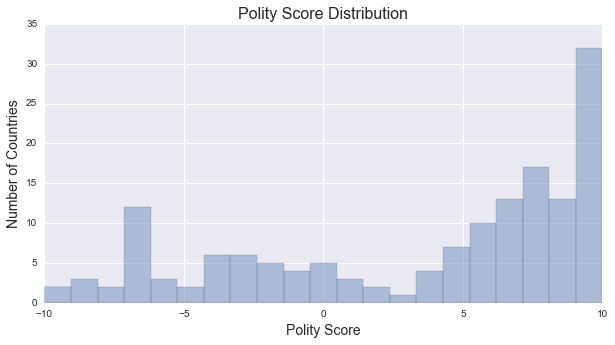

In [22]:
# Polity Score distribution

plt.figure(figsize=(10,5))
g6 = sns.distplot(df2['polityscore'],bins=21,kde=False)
g6.set_title('Polity Score Distribution',fontsize=16)
g6.set_xlabel('Polity Score',fontsize=14)
g6.set_ylabel('Number of Countries',fontsize=14)

In [23]:
# Count scores less than zero

df2.loc[df2['polityscore']<0,['country']].count()

country    45
dtype: int64

In [24]:
# Highest-ranking countries

df2.loc[(df2['polityscore']>=9.1),('country','polityscore')].sort_values(by='country',ascending=True)

,country,polityscore
9,Australia,10
10,Austria,10
32,Canada,10
37,Chile,10
44,Costa Rica,10
48,Cyprus,10
50,Denmark,10
63,Finland,10
69,Germany,10
72,Greece,10


In [25]:
# Identify lower outliers

df2.loc[(df2['polityscore']<=-7),('country','polityscore')].sort_values(by=['polityscore','country'],ascending=True)

,country,polityscore
156,Qatar,-10
167,Saudi Arabia,-10
99,"Korea, Dem. Rep.",-9
197,Turkmenistan,-9
205,Uzbekistan,-9
145,Oman,-8
201,United Arab Emirates,-8
11,Azerbaijan,-7
13,Bahrain,-7
16,Belarus,-7


#### Suicide Rate vs. Polity Score ####


Polity score was reported as a discrete quantitative variable.

The Pearson correlation coefficient of approximately 0.162, which indicates a weak but very slightly positive linear relationship between suicide rate and polity score, has an associated p-value of about 0.045.   Looking at the scatterplot, the spread of points and slight upward slope of the regression line confirms this assessment, and does not show any non-linear relationship in the data.  

The Pearson coefficent (r value) is statistically significant; we have enough evidence to reject the null hypothesis, which states that polity score and suicide rate are not associated.   

Squaring R yields a value of about 0.026, which means that polity score explains 2.6 percent of the variability in suicide rate.  We would need many more variables to be added to the model in order to make truly effective predictions.

In [26]:
# Calculate statistics

stats.pearsonr(df2['polityscore'],df2['suicideper100th'])

(0.16234529356783772, 0.045686170456082961)

In [27]:
0.162345**2

0.026355899024999997

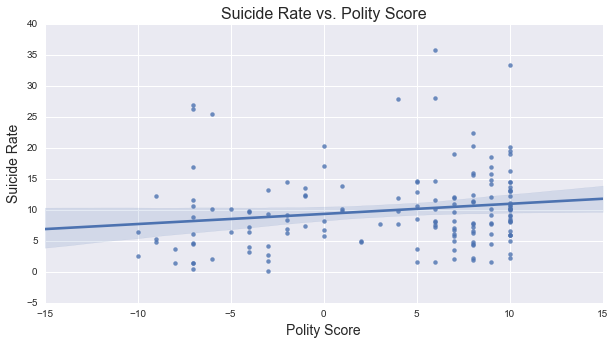

In [28]:
# Create scatterplot

plt.figure(figsize=(10,5))
g7 = sns.regplot(x='polityscore',y='suicideper100th',data=df2)
g7.set_title('Suicide Rate vs. Polity Score',fontsize=16)
g7.set_xlabel('Polity Score', fontsize=14)
g7.set_ylabel('Suicide Rate', fontsize=14)